In [1]:
import tdt2
import two_d_tracer as tdt
import numpy as np
from importlib import reload
%matplotlib notebook
import matplotlib.pyplot as plt
%load_ext snakeviz

In [124]:
reload(tdt2)

<module 'tdt2' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/tdt2.py'>

# ERRRRM

In [162]:
rf = tdt2.RayFactoryLegacy([tdt.Ray([-1, y], [1,1]) for y in np.linspace(-2.5,2.5, 5)])
to = tdt2.Surface([1,0], [-1,0], n_in=1.5)
to2 = tdt2.Surface([2,0], [1,0], n_in=1.5)
scene = tdt2.Scene(rf, [to, to2])

In [163]:
for i in range(5):
    scene.step()
    scene.propagate(0.1)
scene.propagate(2)

<IPython.core.display.Javascript object>


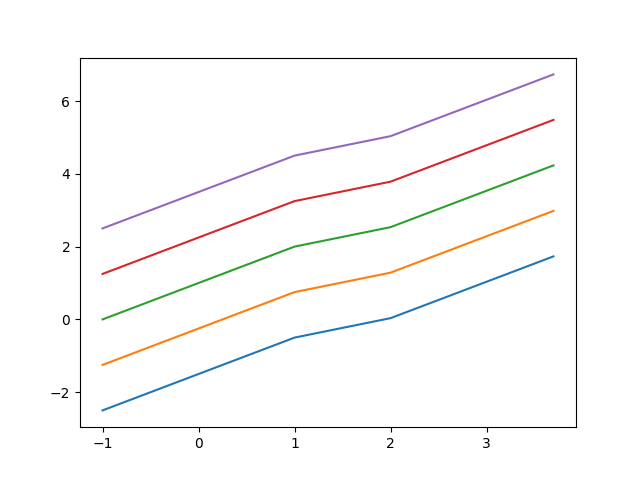

IndexError: index 5 is out of bounds for axis 1 with size 5

In [164]:
fig, ax = plt.subplots()
# for i in range(len(scene.r_origins))
for i in range(10):
    ax.plot(np.array(scene.history)[:,i,0], np.array(scene.history)[:,i,1])
ax.axis("equal")

In [165]:
scene.r_origins, scene.r_dirs

(array([[3.69705627, 1.73157876],
        [3.69705627, 2.98157876],
        [3.69705627, 4.23157876],
        [3.69705627, 5.48157876],
        [3.69705627, 6.73157876]]),
 array([[0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678]]))

In [166]:
scene.propagate(1)

In [167]:
scene.step()
scene.propagate(0.1)

In [168]:
scene.r_origins, scene.r_dirs

(array([[4.47487373, 2.50939622],
        [4.47487373, 3.75939622],
        [4.47487373, 5.00939622],
        [4.47487373, 6.25939622],
        [4.47487373, 7.50939622]]),
 array([[0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678]]))

In [169]:
scene.r_origins

array([[4.47487373, 2.50939622],
       [4.47487373, 3.75939622],
       [4.47487373, 5.00939622],
       [4.47487373, 6.25939622],
       [4.47487373, 7.50939622]])

In [170]:
scene.active[2]=False
scene.active

array([False, False, False, False, False])

In [171]:
scene.active

array([False, False, False, False, False])

In [172]:
obj = to
d = obj.intersect_d(scene.r_origins[scene.active], scene.r_dirs[scene.active])

In [173]:
d = np.full((len(scene.objects), len(scene.r_origins)), np.inf)
for i, obj in enumerate(scene.objects):
    d[i][scene.active] = obj.intersect_d(scene.r_origins[scene.active], scene.r_dirs[scene.active])

In [174]:
scene.r_dirs, np.amin(d.T,axis=1)

(array([[0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.70710678, 0.70710678]]),
 array([inf, inf, inf, inf, inf]))

In [175]:
np.einsum("ij,k->ik,jk", scene.r_dirs, np.amin(d.T,axis=1))

ValueError: einstein sum subscripts string includes output subscript 'k' multiple times

In [176]:
no_collisions = np.count_nonzero(d==np.inf,axis=0) == len(scene.objects)

In [177]:
collisions = np.argmin(d, axis=0)

In [178]:
for i, obj in enumerate(scene.objects):
    print(collisions==i)

[ True  True  True  True  True]
[False False False False False]


In [228]:
a = np.array([[1,0],
              [0,1],
              [1,1]])
b = np.array([[0,1],
              [1,0],
              [0.5,1]])

In [229]:
np.concatenate((a,b))

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 1. ]])

In [180]:
np.sum(a*[1,0], axis=1)

array([1, 0, 1])

In [181]:
m = np.ones(len(scene.r_origins)).astype(bool)
scene.r_origins[m]

array([[4.47487373, 2.50939622],
       [4.47487373, 3.75939622],
       [4.47487373, 5.00939622],
       [4.47487373, 6.25939622],
       [4.47487373, 7.50939622]])

In [182]:
l = [0,1,2,3,4]
def c(a):
    a[0] = 5
print(l)
c(l)
print(l)

[0, 1, 2, 3, 4]
[5, 1, 2, 3, 4]


In [192]:
l = np.array([0,1,2,3,4])
def c(a):
    a[0] = 5
print(l)
l[np.invert(np.array([True, True, False, True, True]))] = 1
print(l)

[0 1 2 3 4]
[0 1 1 3 4]


In [184]:
l = np.array([0,1,2,3,4])
print(l)
l[np.array([True, True, False, True, True])] = 1
print(l)

[0 1 2 3 4]
[1 1 2 1 1]


# Total Internal Reflection

In [125]:
rf = tdt2.RayFactoryLegacy([tdt.Ray([-1, y], [np.cos(y),np.sin(y)]) for y in np.linspace(np.pi/8,np.pi/4,100)])
scene = tdt2.Scene(rf, [tdt2.Surface([0,0], [1,0], n_in=1.5)])

In [126]:
# %%snakeviz
for i in range(5):
    scene.step()
    scene.propagate(1e-10)
scene.propagate(1)

/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/tdt2.py:163: RuntimeWarning: invalid value encountered in sqrt
  cos_t = np.sqrt(1 - (n1 / n2) ** 2 * (1 - cos_i ** 2))
/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/tdt2.py:178: RuntimeWarning: invalid value encountered in sqrt
  np.einsum("i,ij->ij", (n1 / n2 * cos_i - np.sqrt(1 - (n1 / n2) ** 2 * sin_i2)), normals))


<IPython.core.display.Javascript object>


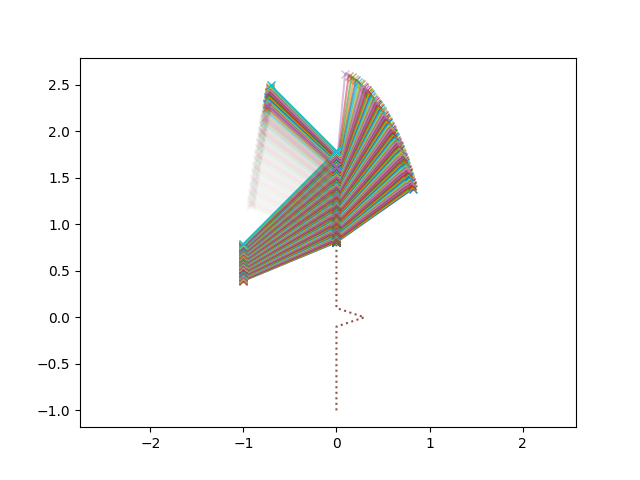

(-1.0909418834906677,
 0.9097795533040203,
 -1.180458374137723,
 2.789625856892183)

In [127]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"marker": "x"})
ax.axis("equal")

# Compare

In [35]:
sc_dsc = {
    "rays": [tdt.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 10000)],
    "objects": [tdt.Surface([0,0], [-1, 0], None, 1, 1.5),
                tdt.Surface([2,0], [1, 0], None, 1, 1.5)]
}
scene = tdt.Scene(**sc_dsc)

In [36]:
%snakeviz scene.run()

 
*** Profile stats marshalled to file '/tmp/tmp3bq2sxa9'. 
Embedding SnakeViz in this document...


In [85]:
rf = tdt2.RayFactoryLegacy([tdt.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 10000)])
scene2 = tdt2.Scene(rf, [tdt2.Surface([0,0], [-1, 0], n_in=1.5),
                        tdt2.Surface([2,0], [1, 0], n_in=1.5)])

In [86]:
%%snakeviz
for i in range(6):
    scene2.step()
    scene2.propagate(1e-10)
scene2.propagate(1)

 
*** Profile stats marshalled to file '/tmp/tmp_wil0v6n'. 
Embedding SnakeViz in this document...


In [87]:
rf = tdt2.RayFactoryLegacy([tdt.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 10000)])
scene2 = tdt2.Scene(rf, [tdt2.Surface([0,0], [-1, 0], n_in=1.5),
                        tdt2.Surface([2,0], [1, 0], n_in=1.5)])

In [88]:
%snakeviz scene2.run()

 
*** Profile stats marshalled to file '/tmp/tmp5dblgiye'. 
Embedding SnakeViz in this document...


<IPython.core.display.Javascript object>


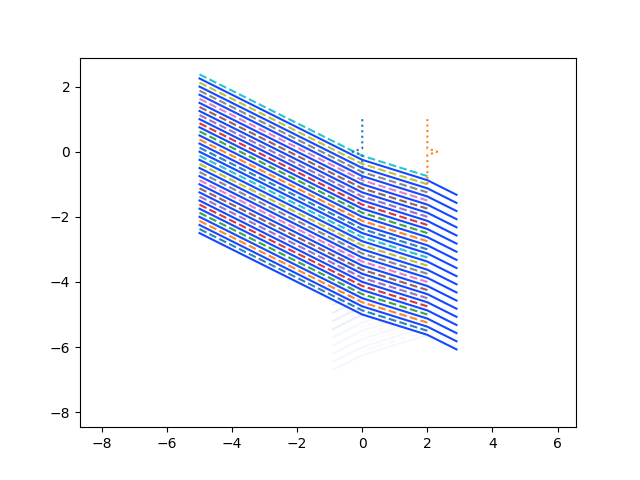

(-5.394721359572356,
 3.2891485510194864,
 -8.462067852535197,
 2.8915616154829746)

In [89]:
fig, ax = plt.subplots()
# for i in range(len(scene.r_origins))
# for i in range(250,len(scene2.r_origins),500):
#     ax.plot(np.array(scene2.history)[:,i,0], np.array(scene2.history)[:,i,1])
for i, ray_hist in enumerate([[scene2.history[j][i] for j in range(len(scene2.history)) if i<len(scene2.history[j])] for i in range(250, len(scene2.history[-1]),500)]):
    rh = np.array(ray_hist)
    ax.plot(rh[:,0], rh[:,1], "--", alpha=scene2.r_weights[i*500+250])

scene.plot(ax, sparse=500)
ax.axis("equal")

# Compare outputs

In [90]:
sc_dsc = {
    "rays": [tdt.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 10)],
    "objects": [tdt.Surface([0,0], [-1, 0], None, 1, 1.5),
                tdt.Surface([2,0], [1, 0], None, 1, 1.5)]
}
scene = tdt.Scene(**sc_dsc)
scene.run()

In [91]:
rf = tdt2.RayFactoryLegacy([tdt.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 10)])
scene2 = tdt2.Scene(rf, [tdt2.Surface([0,0], [-1, 0], n_in=1.5),
                        tdt2.Surface([2,0], [1, 0], n_in=1.5)])

In [92]:
for i in range(5):
    scene2.step()
    scene2.propagate(1e-10)
scene2.propagate(1)

In [93]:
scene.rays

[Ray([ 2.89442719 -6.07190864], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -5.51635309], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -4.96079753], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -4.40524198], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -3.84968642], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -3.29413087], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -2.73857531], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -2.18301975], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -1.6274642 ], [ 0.89442719 -0.4472136 ]),
 Ray([ 2.89442719 -1.07190864], [ 0.89442719 -0.4472136 ]),
 Ray([-0.89442719 -5.4472136 ], [-0.89442719 -0.4472136 ]),
 Ray([-0.89442719 -4.89165804], [-0.89442719 -0.4472136 ]),
 Ray([-0.89442719 -4.33610248], [-0.89442719 -0.4472136 ]),
 Ray([-0.89442719 -3.78054693], [-0.89442719 -0.4472136 ]),
 Ray([-0.89442719 -3.22499137], [-0.89442719 -0.4472136 ]),
 Ray([-0.89442719 -2.66943582], [-0.89442719 -0.4472136 ]),
 Ray([-0.89442719 -2.11388026], [-0.8944

In [94]:
[ray.origin for ray in scene.rays] - scene2.r_origins[:len(scene.rays)]

array([[ 8.94426755e-11, -4.47215598e-11],
       [ 8.94426755e-11, -4.47215598e-11],
       [ 8.94426755e-11, -4.47215598e-11],
       [ 8.94426755e-11, -4.47215598e-11],
       [ 8.94426755e-11, -4.47215598e-11],
       [ 8.94426755e-11, -4.47215598e-11],
       [ 8.94426755e-11, -4.47215598e-11],
       [ 8.94426755e-11, -4.47224480e-11],
       [ 8.94426755e-11, -4.47213377e-11],
       [ 8.94426755e-11, -4.47211157e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47224480e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47212822e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.94425645e-11, -4.47215598e-11],
       [-8.

In [106]:
# The last few weights differ due to different handling of ray culling
np.column_stack(([ray.weight for ray in scene.rays], scene2.r_weights[:len(scene.rays)]))

array([[9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [9.19887119e-01, 9.19887119e-01],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [4.08925405e-02, 4.08925405e-02],
       [3.76165213e-02, 3.76165213e-02],
       [3.76165213e-02, 3.76165213e-02],
       [3.76165213e-02, 3.76165213e-02],
       [3.76165213e-02, 3.76165213e-02],
       [3.761652